In [1]:
import pandas as pd

In [2]:
tabela = pd.read_csv('advertising.csv')

In [3]:
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
tabela.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

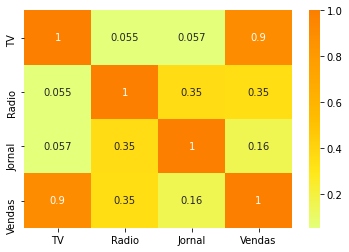

In [9]:
sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
plt.show()

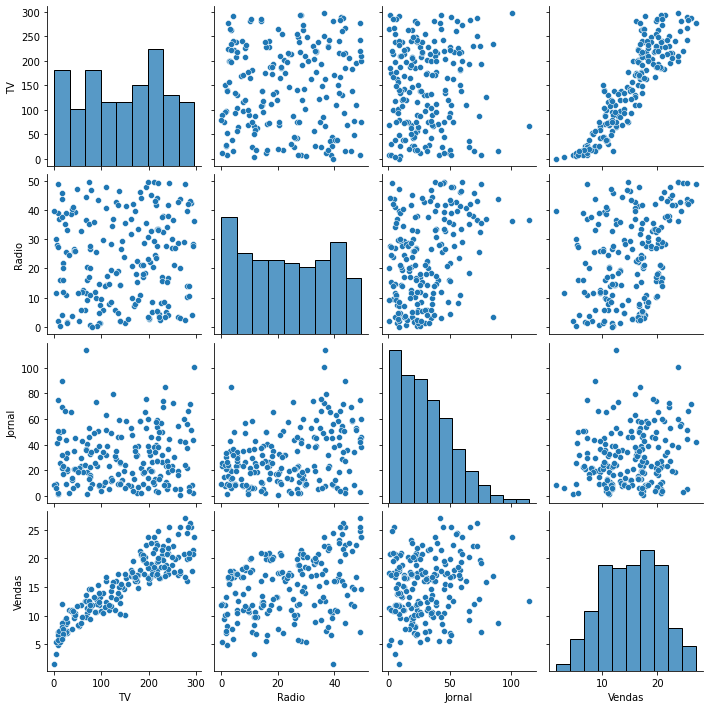

In [11]:
sns.pairplot(tabela)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
y = tabela['Vendas']
x = tabela.drop('Vendas', axis=1)

In [27]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [28]:
x_treino

,TV,Radio,Jornal
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [31]:
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [32]:
from sklearn import metrics

In [39]:
previsao_modelo_regressao_linear = modelo_regressao_linear.predict(x_teste)

previsao_modelo_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

print(f"R2 (Regressão Linear): {metrics.r2_score(y_teste, previsao_modelo_regressao_linear):.2f}%")

print(f"R2 (Árvore de Decisão): {metrics.r2_score(y_teste, previsao_modelo_arvore_decisao):.2f}%")

R2 (Regressão Linear): 0.91%
R2 (Árvore de Decisão): 0.96%


In [40]:
tabela_auxiliar = pd.DataFrame()

tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['previsoes_regressao_linear'] = previsao_modelo_regressao_linear
tabela_auxiliar['previsoes_arvore_decisao'] = previsao_modelo_arvore_decisao

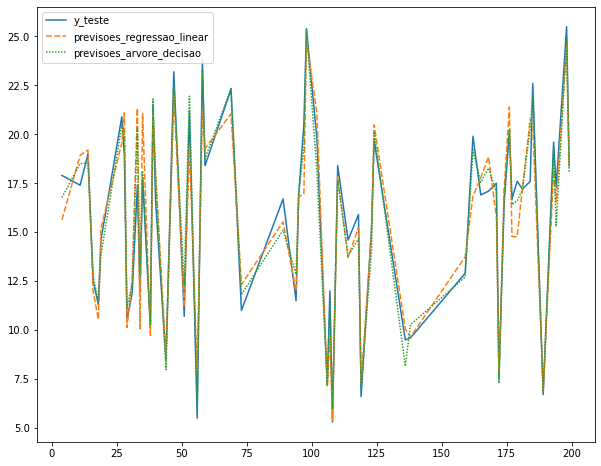

In [42]:
plt.figure(figsize=(10,8))
sns.lineplot(data=tabela_auxiliar)
plt.show()

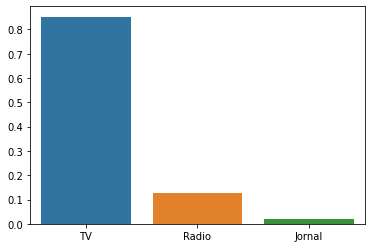

In [43]:
sns.barplot(x=x_treino.columns, y=modelo_arvore_decisao.feature_importances_)
plt.show()

In [53]:
previsao_valores_novos = pd.DataFrame([[250.1, 35.8, 60.2]], columns=['TV', 'Radio', 'Jornal'])
previsao_valores_novos

,TV,Radio,Jornal
0,250.1,35.8,60.2


In [54]:
modelo_arvore_decisao.predict(previsao_valores_novos)[0]

21.236000000000008